### Diabetes in Youth Vs Adult in India

About Dataset
This dataset, "Diabetes in Young Adults in India", contains 100,000 records of synthetic but realistic data reflecting the prevalence of diabetes and associated factors among young adults (ages 15-25) in India. The data is designed to capture genetic predispositions, lifestyle habits, and key health metrics that influence the onset of diabetes in this demographic.

The dataset includes columns for demographic details, genetic risk factors, lifestyle habits, health metrics, and diabetes outcomes. It offers opportunities for exploring trends, patterns, and correlations that contribute to diabetes onset in young populations.

Columns and descriptions:

- ID : Unique identifier for each record
- Age : Age of the individual (15-25 years)
- Gender : Gender of the individual: Male, Female, or Other
- Region : Region in India where the individual resides
- Family_Income : Annual family income in INR
- Family_History_Diabetes : Indicates if there is a family history of diabetes (Yes or No)
- Parent_Diabetes_Type : Indicates if parents have diabetes and its type: Type 1, Type 2, or None
- Genetic_Risk_Score : A numeric score (1-10) indicating genetic predisposition to diabetes
- BMI : Body Mass Index, a measure of body fat based on height and weight
- Physical_Activity_Level : Level of physical activity: Sedentary, Moderate, or Active

### Business Task

#### Identifying Key Risk Factors and Regional Trends in Diabetes

Background:

Our organization is focused on reducing diabetes prevalence in India by identifying high-risk groups and designing effective health interventions. This dataset contains demographic, lifestyle, and health data for individuals across various regions. We need actionable insights to guide our decisions on where to focus our efforts and what factors to prioritize in awareness and prevention campaigns.

Objectives:

	* Understand Demographics and Regional Patterns:

•	Identify regions with the highest prevalence of prediabetes and diabetes.

•	Determine the age and gender distribution of diabetes cases.

	* Analyze Risk Factors:

•	Identify the top factors contributing to prediabetes and diabetes (e.g., BMI, sleep, stress, physical activity level, genetic risk score, etc.).

•	Explore correlations between lifestyle factors (e.g., screen time, smoking, alcohol consumption) and diabetes risk.

	* Targeted Recommendations:

•	Highlight key regions, age groups, or behaviors for intervention campaigns.

•	Suggest recommendations for reducing the prevalence of diabetes based on data-driven insights.

Deliverables:

	* Analysis Report:

•	A summary of your findings on demographics, risk factors, and trends.

•	Visualizations showing trends and correlations (e.g., bar charts, scatterplots, heatmaps).

	* Actionable Recommendations:

•	A list of evidence-based suggestions for targeted intervention campaigns.

Key Questions to Answer:

1.	Which regions, age groups, and genders are at the highest risk of diabetes?
2.	What lifestyle factors (e.g., BMI, sleep, physical activity) show the strongest correlation with prediabetes and diabetes?
3.	Are there any alarming trends, such as sedentary lifestyles or high stress levels, contributing to diabetes prevalence?
4.	How does family history or genetic risk impact diabetes across different demographics?

Expected Outcomes:

* Insights: Clear identification of high-risk groups and contributing factors.

* Recommendations: Practical, data-driven strategies for reducing diabetes risk.

* Visualizations: Easy-to-understand charts and graphs for decision-making.


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

In [124]:
# Importing the kaggle dataset
import kagglehub 

path = kagglehub.dataset_download("ankushpanday1/diabetes-in-youth-vs-adult-in-india")

print("Path to dataset files: ", path)

Path to dataset files:  C:\Users\HP\.cache\kagglehub\datasets\ankushpanday1\diabetes-in-youth-vs-adult-in-india\versions\1


In [125]:
df = pd.read_csv(r"C:\Users\HP\.cache\kagglehub\datasets\ankushpanday1\diabetes-in-youth-vs-adult-in-india\versions\1\diabetes_young_adults_india.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       100000 non-null  int64  
 1   Age                      100000 non-null  int64  
 2   Gender                   100000 non-null  object 
 3   Region                   100000 non-null  object 
 4   Family_Income            100000 non-null  int64  
 5   Family_History_Diabetes  100000 non-null  object 
 6   Parent_Diabetes_Type     34903 non-null   object 
 7   Genetic_Risk_Score       100000 non-null  int64  
 8   BMI                      100000 non-null  float64
 9   Physical_Activity_Level  100000 non-null  object 
 10  Dietary_Habits           100000 non-null  object 
 11  Fast_Food_Intake         100000 non-null  int64  
 12  Smoking                  100000 non-null  object 
 13  Alcohol_Consumption      100000 non-null  object 
 14  Fasti

In [127]:
df.head()

,ID,Age,Gender,Region,Family_Income,Family_History_Diabetes,Parent_Diabetes_Type,Genetic_Risk_Score,BMI,Physical_Activity_Level,...,Smoking,Alcohol_Consumption,Fasting_Blood_Sugar,HbA1c,Cholesterol_Level,Prediabetes,Diabetes_Type,Sleep_Hours,Stress_Level,Screen_Time
0,1,21,Male,North,2209393,No,NaN,6,31.4,Sedentary,...,Yes,No,95.6,9.5,163.3,Yes,NaN,7.7,7,6.8
1,2,18,Female,Central,387650,No,NaN,5,24.4,Active,...,No,No,164.9,5.0,169.1,Yes,NaN,7.9,8,6.0
2,3,25,Male,North,383333,No,NaN,6,20.0,Moderate,...,No,No,110.5,8.3,296.3,Yes,Type 1,7.6,8,4.6
3,4,22,Male,Northeast,2443733,No,NaN,4,39.8,Moderate,...,No,Yes,160.7,4.6,252.8,No,NaN,9.5,2,10.9
4,5,19,Male,Central,1449463,No,NaN,4,19.2,Moderate,...,No,Yes,73.7,5.3,252.3,No,NaN,6.4,2,1.3


In [128]:
df.describe()

,ID,Age,Family_Income,Genetic_Risk_Score,BMI,Fast_Food_Intake,Fasting_Blood_Sugar,HbA1c,Cholesterol_Level,Sleep_Hours,Stress_Level,Screen_Time
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,50000.500000,20.007890,1.299440e+06,5.505340,28.028089,4.988580,125.072216,7.006461,209.903952,6.988082,5.50681,6.503842
std,28867.657797,3.154934,6.919403e+05,2.872218,6.924196,3.169762,31.788613,1.735327,52.049374,1.734122,2.87943,3.170210
min,1.000000,15.000000,1.000040e+05,1.000000,16.000000,0.000000,70.000000,4.000000,120.000000,4.000000,1.00000,1.000000
25%,25000.750000,17.000000,7.022028e+05,3.000000,22.100000,2.000000,97.600000,5.500000,164.800000,5.500000,3.00000,3.800000
50%,50000.500000,20.000000,1.299990e+06,6.000000,28.000000,5.000000,125.200000,7.000000,209.800000,7.000000,6.00000,6.500000
75%,75000.250000,23.000000,1.898916e+06,8.000000,34.000000,8.000000,152.600000,8.500000,255.000000,8.500000,8.00000,9.300000
max,100000.000000,25.000000,2.499974e+06,10.000000,40.000000,10.000000,180.000000,10.000000,300.000000,10.000000,10.00000,12.000000


In [129]:
# Checking for missing values
df.isnull().sum()

# Missing values are present in 'Parent_Diabetes_Type' , 'Diabetes_Type '

ID                             0
Age                            0
Gender                         0
Region                         0
Family_Income                  0
Family_History_Diabetes        0
Parent_Diabetes_Type       65097
Genetic_Risk_Score             0
BMI                            0
Physical_Activity_Level        0
Dietary_Habits                 0
Fast_Food_Intake               0
Smoking                        0
Alcohol_Consumption            0
Fasting_Blood_Sugar            0
HbA1c                          0
Cholesterol_Level              0
Prediabetes                    0
Diabetes_Type              74776
Sleep_Hours                    0
Stress_Level                   0
Screen_Time                    0
dtype: int64

In [130]:
df.shape # (100000, 22)

(100000, 22)

##### Objective 1

 Understand Demographics and Regional Patterns:

•	Identify regions with the highest prevalence of prediabetes and diabetes.

•	Determine the age and gender distribution of diabetes cases.

In [131]:
# Before jumping into the analysis let's just make a copy of the original dataframe
df_analyze = df.copy()

df_analyze.head()

df_analyze.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Family_Income',
       'Family_History_Diabetes', 'Parent_Diabetes_Type', 'Genetic_Risk_Score',
       'BMI', 'Physical_Activity_Level', 'Dietary_Habits', 'Fast_Food_Intake',
       'Smoking', 'Alcohol_Consumption', 'Fasting_Blood_Sugar', 'HbA1c',
       'Cholesterol_Level', 'Prediabetes', 'Diabetes_Type', 'Sleep_Hours',
       'Stress_Level', 'Screen_Time'],
      dtype='object')

In [132]:
''' 
Prediabetes means you have a higher than normal blood sugar level.

Region, Prediabetes,Genetic_Risk_Score,HbA1c     


general HbA1c levels:

Non-diabetics: A normal HbA1c level is below 5.5% (36 mmol/mol). 

Prediabetes: An HbA1c level between 5.7% and 6.4% indicates prediabetes. 

Diabetes: An HbA1c level of 6.5% or higher indicates diabetes. 


'''

region_and_diabetes = df_analyze[['Region','Prediabetes','HbA1c','Genetic_Risk_Score']]



def is_diabetic(value):
    if value < 5.5:
        return 'Non-Diabetic'
    elif 5.7 <= value <= 6.4:
        return 'Prediabetic'
    else:
        return 'Diabetic'

region_and_diabetes['Diabetes_Status'] = region_and_diabetes['HbA1c'].apply(is_diabetic)

region_and_diabetes.head()


,Region,Prediabetes,HbA1c,Genetic_Risk_Score,Diabetes_Status
0,North,Yes,9.5,6,Diabetic
1,Central,Yes,5.0,5,Non-Diabetic
2,North,Yes,8.3,6,Diabetic
3,Northeast,No,4.6,4,Non-Diabetic
4,Central,No,5.3,4,Non-Diabetic


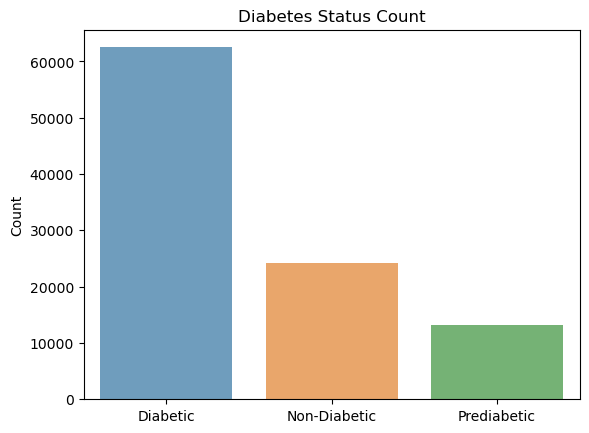

In [133]:
diabetic_count = region_and_diabetes['Diabetes_Status'].value_counts().reset_index(name='Count')

sns.barplot(x='Diabetes_Status', y='Count', data=diabetic_count, hue='Diabetes_Status', alpha = 0.7)
plt.title('Diabetes Status Count')
plt.gca().set_xlabel(None)
plt.show()


In [134]:
diabetic_filter = region_and_diabetes[region_and_diabetes['Diabetes_Status'] == 'Diabetic']

diabetic_filter['Region'].value_counts()

# The 'Northeast' region leads in diabetes count 

Region
Northeast    10482
North        10472
Central      10455
East         10391
West         10374
South        10334
Name: count, dtype: int64

Prediabetes
No     69.979
Yes    30.021
Name: proportion, dtype: float64


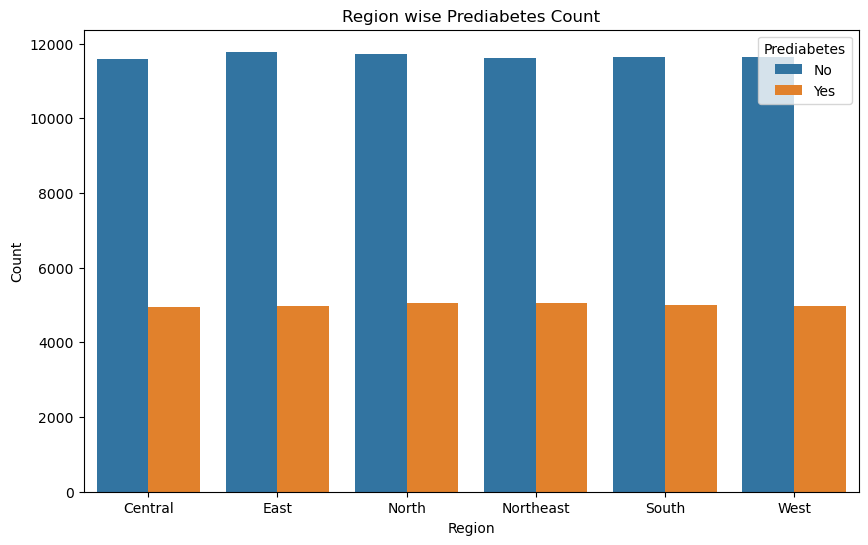

In [135]:
diabetes_1 = region_and_diabetes[['Region', 'Prediabetes']].groupby(['Region', 'Prediabetes']).size().reset_index(name='Count')


plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Count', hue='Prediabetes', data=diabetes_1)
plt.title('Region wise Prediabetes Count')


percentages = (df_analyze['Prediabetes']).value_counts(normalize=True)*100
print(percentages)

# Across all the regions 70% of population doesn't have prediabetes

In [136]:
diabetes_yes = diabetes_1[diabetes_1['Prediabetes'] == 'Yes']

diabetes_yes_sorted = diabetes_yes.sort_values(by='Count', ascending=False)

print(diabetes_yes_sorted)


       Region Prediabetes  Count
7   Northeast         Yes   5065
5       North         Yes   5046
9       South         Yes   5004
11       West         Yes   4981
3        East         Yes   4971
1     Central         Yes   4954


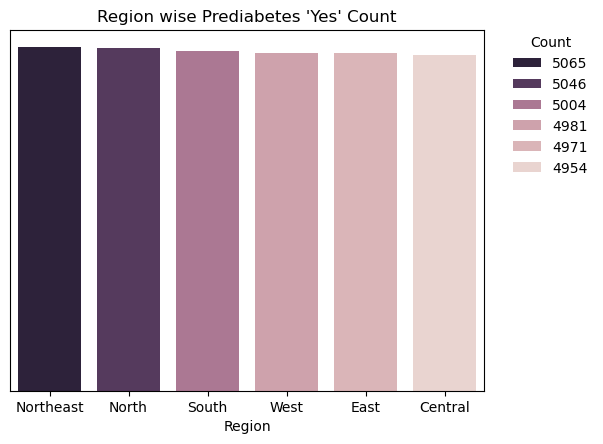

In [137]:
sns.barplot(x='Region', y ='Count',data=diabetes_yes_sorted,hue='Count')
plt.title("Region wise Prediabetes 'Yes' Count")
plt.ylabel(None)
plt.yticks([])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title="Count", loc='upper left', bbox_to_anchor=(1.05,1),
           borderaxespad=0.,frameon=False)
plt.tight_layout(pad=2.0)
plt.show()

## The Northeast region has the most number of Prediabetes cases (5065) and the least being 'Central' region with 4954 cases

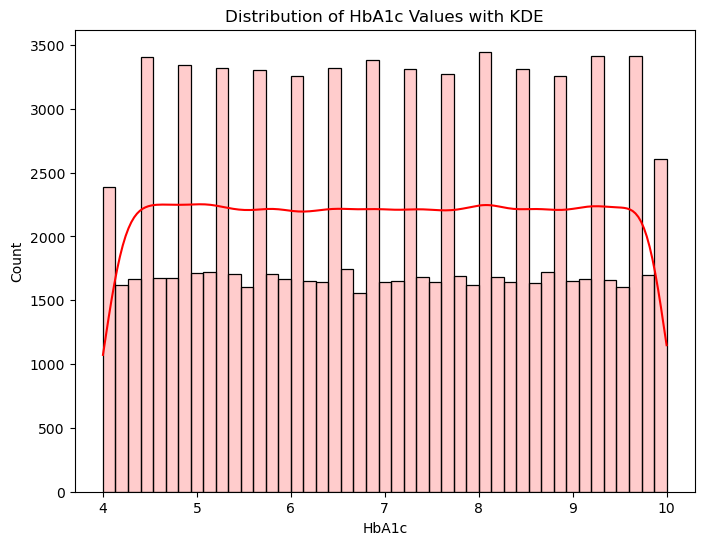

In [138]:
plt.figure(figsize=(8,6))
sns.histplot(
    region_and_diabetes['HbA1c'],
    bins=45,
    kde=True,
    color='red',
    edgecolor='black',
    alpha=0.2
)
plt.title('Distribution of HbA1c Values with KDE')
plt.show()


In [139]:
top_5_HbA1c_values = region_and_diabetes['HbA1c'].value_counts().sort_values(ascending=False).head(5)
print(top_5_HbA1c_values)

HbA1c
6.6    1741
8.1    1740
4.8    1725
9.6    1725
5.1    1722
Name: count, dtype: int64


In [140]:
top_10_HbA1c_values = region_and_diabetes['HbA1c'].value_counts().sort_values(ascending=False).head(10)

filtered_df = region_and_diabetes[region_and_diabetes['HbA1c'].isin(top_10_HbA1c_values.index)]

region_counts = filtered_df.groupby('Region')['HbA1c'].value_counts().reset_index(name='Count')

# The top 5 HbA1c values are 6.6,8.1,4.8,9.6,5.1

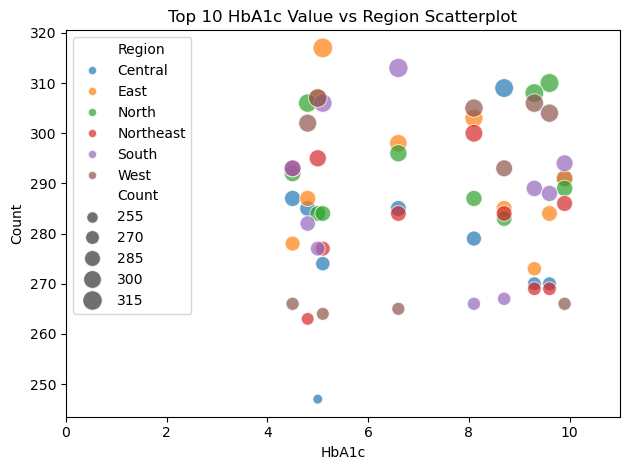

In [141]:
sns.scatterplot(x='HbA1c', y='Count', hue='Region', data=region_counts, alpha=0.7, size='Count', sizes=(50, 200))
plt.xlim(0,11)
plt.title('Top 10 HbA1c Value vs Region Scatterplot')
plt.xlabel = 'HbA1c Value'
plt.tight_layout()
plt.show()


# West and North seems to have higher levels of HbA1c value 

In [142]:
# Determine the age and gender distribution of diabetes cases
df_analyze.columns

age_and_diabetes = df_analyze[['Age', 'Gender', 'HbA1c', 'Prediabetes','Diabetes_Type']]

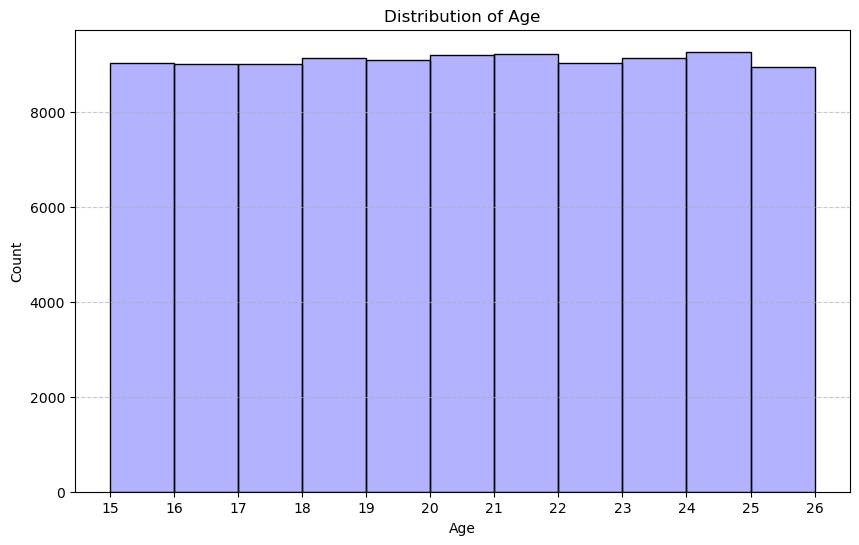

Age
24    9259
21    9205
20    9194
18    9127
23    9123
19    9089
15    9031
22    9030
17    9006
16    9005
25    8931
Name: count, dtype: int64


In [143]:
plt.figure(figsize=(10,6))
sns.histplot(age_and_diabetes['Age'],
             bins=range(15,27),
             color='blue',
             alpha=0.3,
             edgecolor='black')

plt.title('Distribution of Age')
plt.xticks(range(15,27))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(age_and_diabetes['Age'].value_counts())

# The dataset contains age group ranging from 15 to 25, where students with age 24 having the highest number of data count

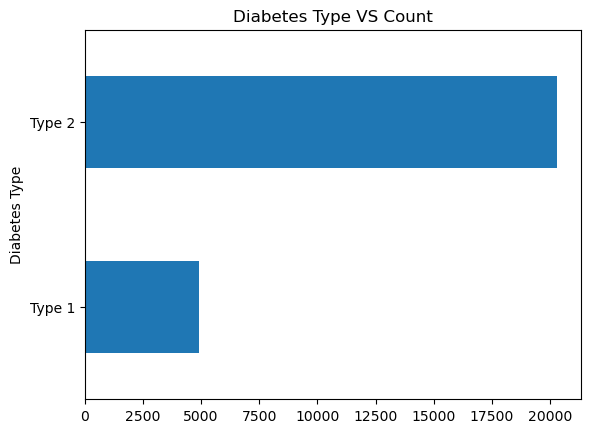

Diabetes_Type
Type 2    80.467016
Type 1    19.532984
Name: proportion, dtype: float64


In [144]:
age_and_diabetes['Diabetes_Type'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Diabetes Type VS Count')
plt.ylabel('Diabetes Type')
plt.show()

print(age_and_diabetes['Diabetes_Type'].value_counts(normalize=True)*100)

# The most appeared diabetes type is Type_2 resulting in 80% of the total counts.

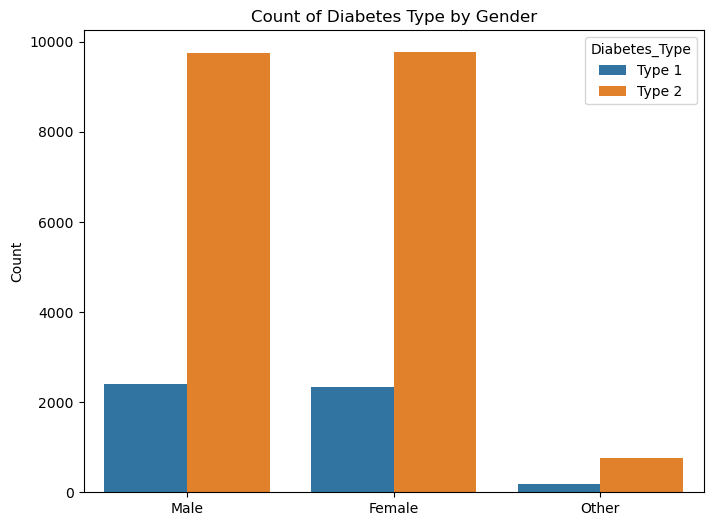

In [145]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Diabetes_Type', data=age_and_diabetes)

plt.title('Count of Diabetes Type by Gender')
plt.gca().set_xlabel(None)
plt.ylabel('Count')
plt.show()

In [146]:
def is_diabetic(value):
    if value < 5.5:
        return 'Non-Diabetic'
    elif 5.7 <= value <= 6.4:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df_analyze['Diabetes_Status'] = df_analyze['HbA1c'].apply(is_diabetic)

In [147]:
age_gender_diabetes = df_analyze[['Age','Gender', 'Diabetes_Status']]

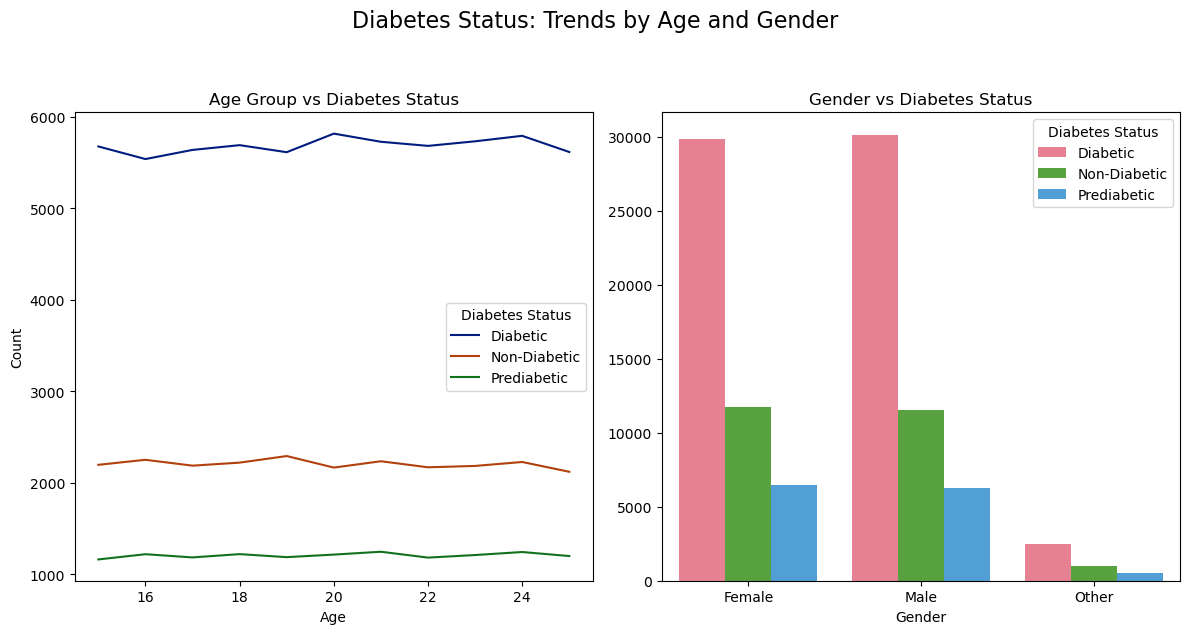

In [148]:
line_chart = (
    age_gender_diabetes.groupby(['Age', 'Diabetes_Status'])
    .agg('size')
    .reset_index(name='Count')
)

bar_chart = (
    age_gender_diabetes.groupby(['Gender', 'Diabetes_Status'])
    .agg('size')
    .reset_index(name='Count')
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("Diabetes Status: Trends by Age and Gender", fontsize=16, y=1.05) 

sns.lineplot(
    x='Age', y='Count', hue='Diabetes_Status', data=line_chart, palette='dark', ax=ax1
)
ax1.set_title('Age Group vs Diabetes Status')
ax1.legend(title='Diabetes Status')

sns.barplot(x='Gender', y='Count', hue='Diabetes_Status', data=bar_chart, palette='husl', ax=ax2)
ax2.set_title('Gender vs Diabetes Status')
ax2.legend(title='Diabetes Status')
ax2.set_ylabel(None)


plt.tight_layout()

plt.show()

##### Objective 2

 Analyze Risk Factors:

•	Identify the top factors contributing to prediabetes and diabetes (e.g., BMI, sleep, stress, physical activity level, genetic risk score, etc.).

•	Explore correlations between lifestyle factors (e.g., screen time, smoking, alcohol consumption) and diabetes risk.

In [149]:
top_diabetes_factor = df_analyze[['Sleep_Hours', 'Stress_Level', 'Screen_Time','Prediabetes','Diabetes_Status','BMI','Physical_Activity_Level','Genetic_Risk_Score','Age']]

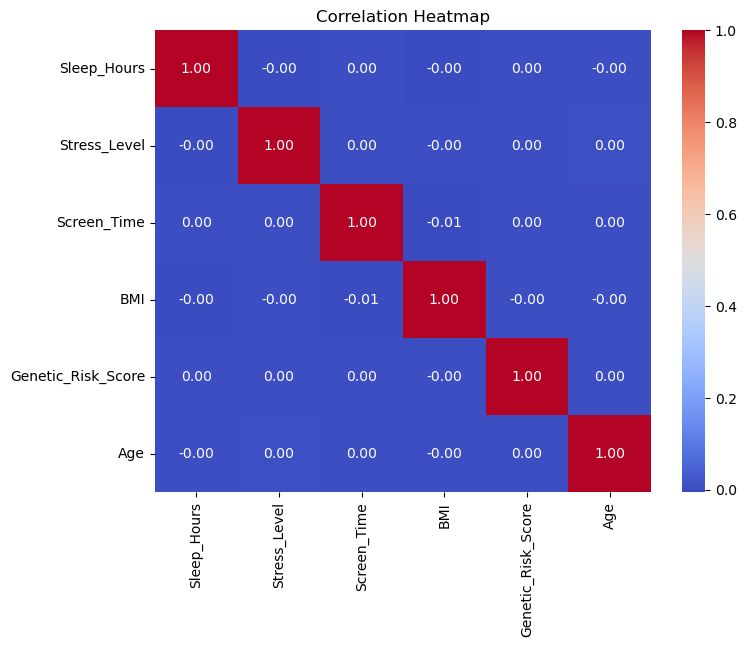

In [150]:
numerical_df = top_diabetes_factor.select_dtypes(include=['number'])

corr_matrix = numerical_df.corr()

# corr_matrix = top_diabetes_factor[['Sleep_Hours', 'Stress_Level', 'Screen_Time','BMI','Genetic_Risk_Score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

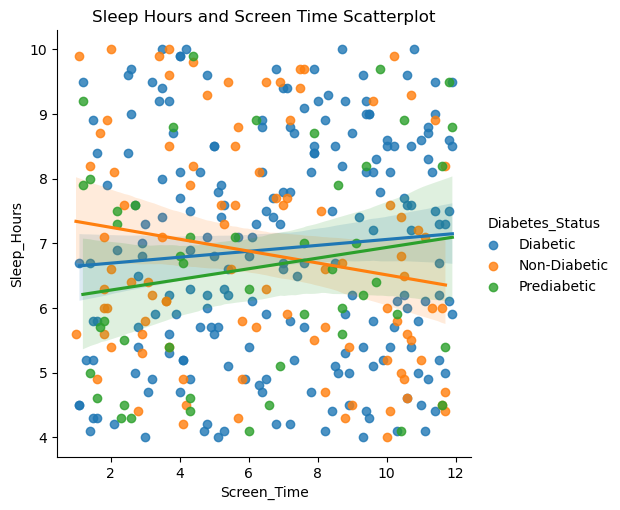

In [151]:
factors_grouped = top_diabetes_factor[['Sleep_Hours', 'Stress_Level', 'Screen_Time','Diabetes_Status']]

grouped_sample = factors_grouped.sample(350, random_state=44)


sns.lmplot(x='Screen_Time', 
           y='Sleep_Hours', 
           hue = 'Diabetes_Status',
           data=grouped_sample, 
           )
           
plt.title('Sleep Hours and Screen Time Scatterplot')
plt.show()

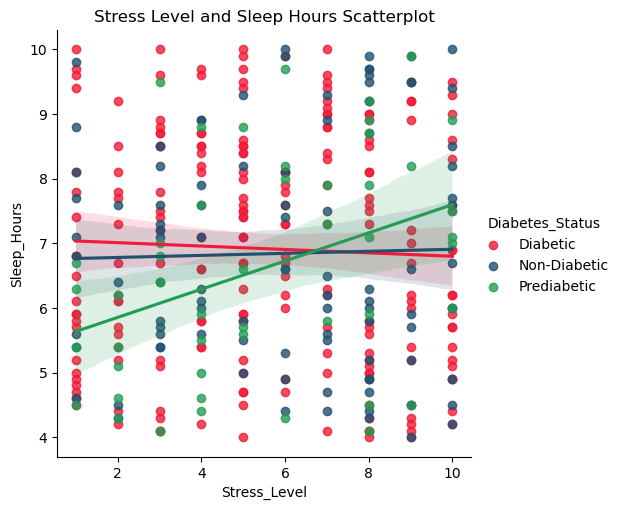

In [152]:
plot_color= ['#f21b37','#225170', '#249c54' ]


sns.lmplot(x='Stress_Level', 
           y='Sleep_Hours', 
           hue = 'Diabetes_Status',
           data=grouped_sample,
           palette=plot_color
           )            
plt.title('Stress Level and Sleep Hours Scatterplot')
plt.show()

In [153]:
## Mean Sleep hours

mean_sleep_hours_by_diabetes_status = {
    status: top_diabetes_factor[top_diabetes_factor['Diabetes_Status'] == status]['Sleep_Hours'].mean()
    for status in top_diabetes_factor['Diabetes_Status'].unique()
}

print(mean_sleep_hours_by_diabetes_status)

# The average sleep hours of all the three diabetes status groups is around 6.9 hours and there isn't any specific trend visible 
# with sleep hours and screen time

{'Diabetic': 6.984454789786907, 'Non-Diabetic': 6.99713649117016, 'Prediabetic': 6.988631563065781}


In [154]:
## Mean screentime 

mean_screen_time_by_diabetes_status = {
    scrt: top_diabetes_factor[top_diabetes_factor['Diabetes_Status'] == scrt]['Screen_Time'].mean()
    for scrt in top_diabetes_factor['Diabetes_Status'].unique()
}

print(mean_screen_time_by_diabetes_status)

{'Diabetic': 6.500843092084214, 'Non-Diabetic': 6.512889915827695, 'Prediabetic': 6.5014408569704285}


In [155]:
## Mean stress level
mean_stress_level_by_diabetes_status = {
    stress: top_diabetes_factor[top_diabetes_factor['Diabetes_Status'] == stress]['Stress_Level'].mean()
    for stress in top_diabetes_factor['Diabetes_Status'].unique()
}

print(mean_stress_level_by_diabetes_status)

{'Diabetic': 5.511486529724196, 'Non-Diabetic': 5.509324971117346, 'Prediabetic': 5.4801599275799635}


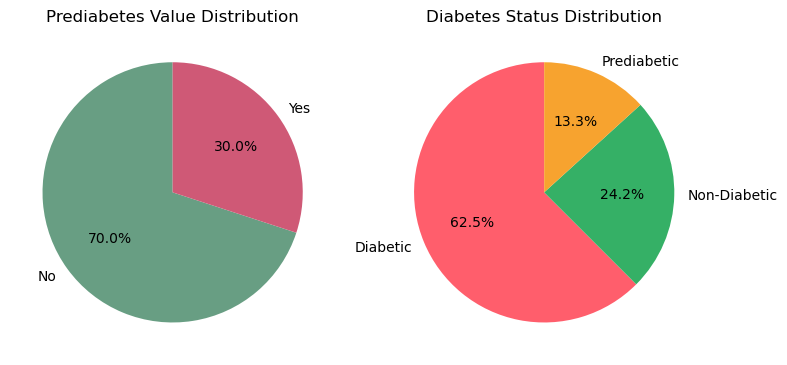

In [156]:
Prediabetes_Percentage = top_diabetes_factor['Prediabetes'].value_counts(normalize=True) * 100

Diabetes_percentage = top_diabetes_factor['Diabetes_Status'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))

# Plot 1
plt.subplot(1, 2, 1)
plt.pie(Prediabetes_Percentage,
        labels=Prediabetes_Percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#689e83', '#cf5976'])
plt.title('Prediabetes Value Distribution')

# Plot 2
plt.subplot(1, 2, 2)
plt.pie(Diabetes_percentage,
        labels=Diabetes_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff5e6c', '#35b066', '#f7a32f'])
        
plt.title('Diabetes Status Distribution')

plt.tight_layout()
plt.show()

# From the pie-chart it is clear that the Prediabetes value and actual Diabetes figures are different, the actual diabetes cases are 62% which suggests further evaluation of Prediabetes test results

In [157]:
''' 
BMI ranges:

> under 18.5 - This is described as underweight. 
> between 18.5 and 24.9 - This is described as the 'healthy range'.
> between 25 and 29.9 - This is described as overweight
> between 30 and 39.9 - This is described as obesity
> 40 or over - This is described as severe obesity
'''
top_diabetes_factor['BMI'].mean()
# the average BMI value of the population is 28

def bmi_status(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value <= 24.9:
        return 'Healthy'
    elif 25 <= value <= 29.9:
        return 'Overweight'
    elif 30 <= value <= 39.9:
        return 'Obese'
    else:
        return 'Severely Obese'
    

top_diabetes_factor['BMI Status'] = top_diabetes_factor['BMI'].apply(bmi_status)

BMI Status
Obese             41737
Healthy           27059
Overweight        20880
Underweight       10105
Severely Obese      219
Name: count, dtype: int64


Text(0.5, 1.0, 'BMI Status Across the Population')

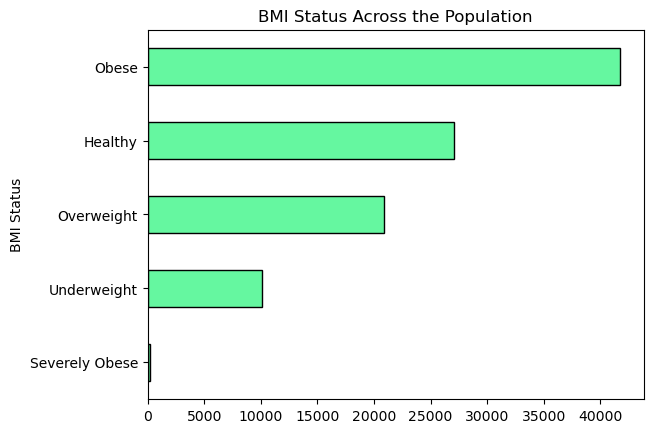

In [158]:
top_diabetes_factor.head()


print(top_diabetes_factor['BMI Status'].value_counts())

top_diabetes_factor['BMI Status'].value_counts(ascending = True).plot(
        kind='barh', 
        color='#65f7a0',                                                             
        edgecolor='black')        
                                                    
plt.title('BMI Status Across the Population')

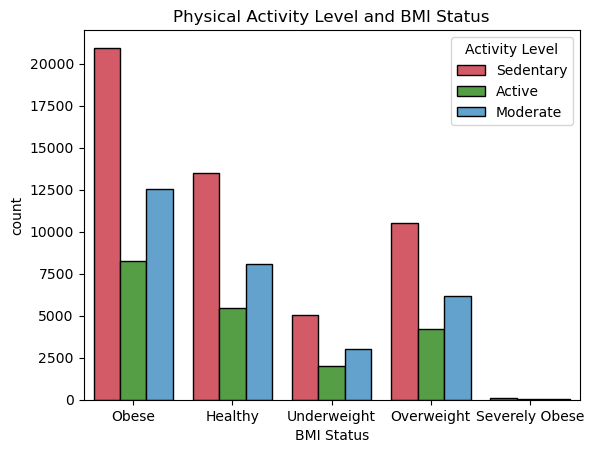

In [159]:
custom_colors = ['#e64757','#4dad36','#50a6de']

sns.countplot(x='BMI Status', 
              hue='Physical_Activity_Level', 
              data=top_diabetes_factor,
              palette=custom_colors,
              edgecolor='black')
plt.title('Physical Activity Level and BMI Status')
plt.legend(title='Activity Level')

# From the figure it is clear that the phyical activity level of majority students are Sedentary, the most sedentary category students resulted in developing more obesity and overweight

In [160]:
# Cholesterol_Level, Screen_Time. Smoking, Alcohol_Consumption

lifestyle_factors = df_analyze[['Cholesterol_Level', 'Screen_Time', 'Smoking', 'Alcohol_Consumption','Diabetes_Status']]

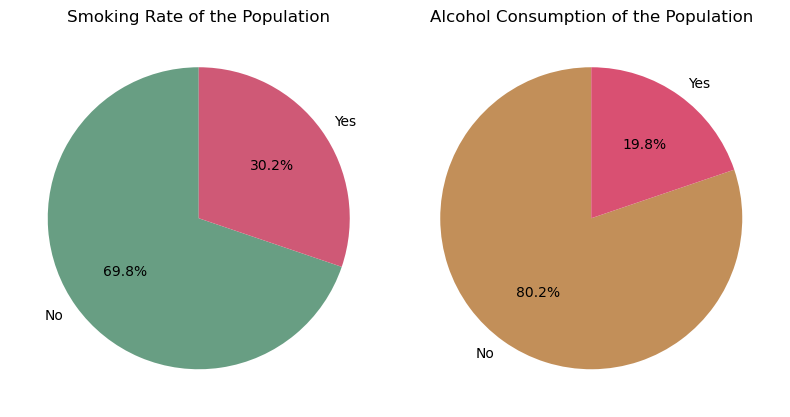

In [161]:
smoking_rate = lifestyle_factors['Smoking'].value_counts(normalize=True) * 100

alcohol_consumption = lifestyle_factors['Alcohol_Consumption'].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))

# Plot 1
plt.subplot(1, 2, 1)
plt.pie(smoking_rate,
        labels=smoking_rate.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#689e83', '#cf5976'])
plt.title('Smoking Rate of the Population')

# Plot 2
plt.subplot(1, 2, 2)
plt.pie(alcohol_consumption,
        labels=alcohol_consumption.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#c28f59', '#d95072'])
        
plt.title('Alcohol Consumption of the Population')

plt.tight_layout()
plt.show()

# Around 30% of the population are smokers and 20% consumes alcohol

In [162]:
# lifestyle_factors['Cholesterol_Level'].plot(kind='hist', bins = 20)

'''
125 to 200 is the normal range of cholestrol
> 200 to 239 is not a good cholestrol level
> 240 is very high cholestrol case
 '''

high_cholestrol_group = lifestyle_factors[lifestyle_factors['Cholesterol_Level'] > 200]

high_cholestrol_group.groupby(['Cholesterol_Level']).size().sort_values(ascending=False).reset_index(name='Count')

# In bad cholestrol category the most students are having the value of 206 followed by 298

,Cholesterol_Level,Count
0,206.7,84
1,298.5,77
2,289.5,77
3,230.3,75
4,292.7,75
...,...,...
995,268.8,38
996,229.4,35
997,217.2,35
998,255.4,34


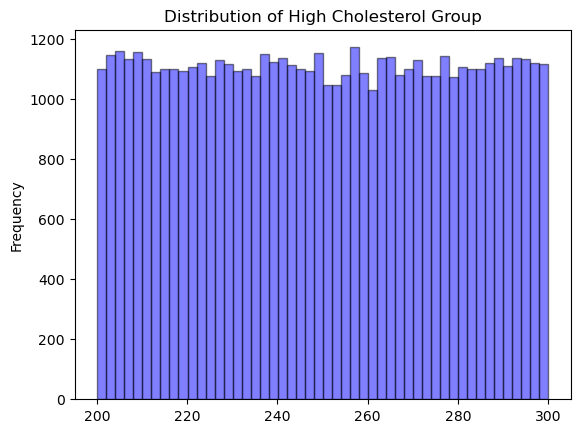

In [163]:
high_cholestrol_group['Cholesterol_Level'].plot(kind='hist', bins =50, color='blue', alpha =0.5,edgecolor='black')
plt.title('Distribution of High Cholesterol Group')
plt.show()

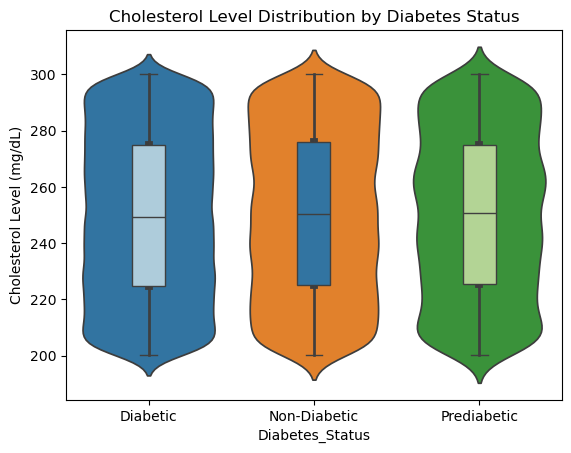

In [164]:
sns.violinplot(x='Diabetes_Status', y='Cholesterol_Level', hue='Diabetes_Status', data=high_cholestrol_group)
sns.boxplot(x='Diabetes_Status', y='Cholesterol_Level', data=high_cholestrol_group,width=0.2,hue='Diabetes_Status',palette='Paired')
plt.title('Cholesterol Level Distribution by Diabetes Status')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.show()


In [165]:
final_analysis = df_analyze[['Family_History_Diabetes','Diabetes_Status','Parent_Diabetes_Type','Dietary_Habits', 'Fast_Food_Intake']]
           

In [166]:
diabetic_group = final_analysis[final_analysis['Diabetes_Status'] == 'Diabetic']

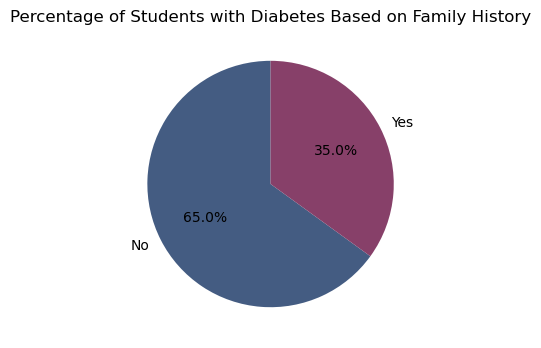

In [167]:
family_history_percentage = diabetic_group['Family_History_Diabetes'].value_counts(normalize=True)*100

plt.figure(figsize=(5,4))
plt.pie(family_history_percentage,
        labels=family_history_percentage.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#445c82', '#874069'])
plt.title('Percentage of Students with Diabetes Based on Family History')
plt.show()


# Among the population 35% of students seem to have diabetes where their family history is also observed to be diabetic

In [168]:
# Replacing 'NaN' values in the data frame with 'Unknown'
final_analysis['Parent_Diabetes_Type'] = final_analysis['Parent_Diabetes_Type'].fillna('Unknown')

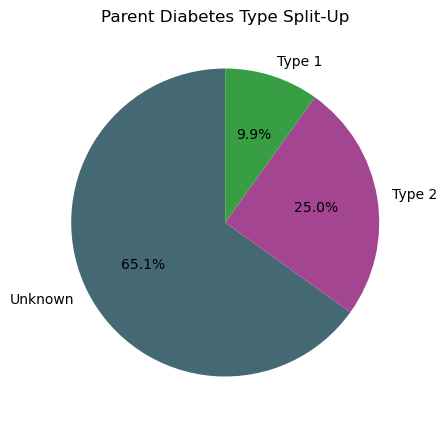

In [169]:
plt.figure(figsize=(5,5))
plt.pie(final_analysis['Parent_Diabetes_Type'].value_counts(),
        labels=final_analysis['Parent_Diabetes_Type'].unique(),
        autopct='%1.1f%%',
        startangle=90,
        colors=['#456973', '#a34591','#379e44'])
plt.title('Parent Diabetes Type Split-Up')
plt.show()

# Of the available data 65% of results are unknown, 25% accounts to Type 2 diabetes

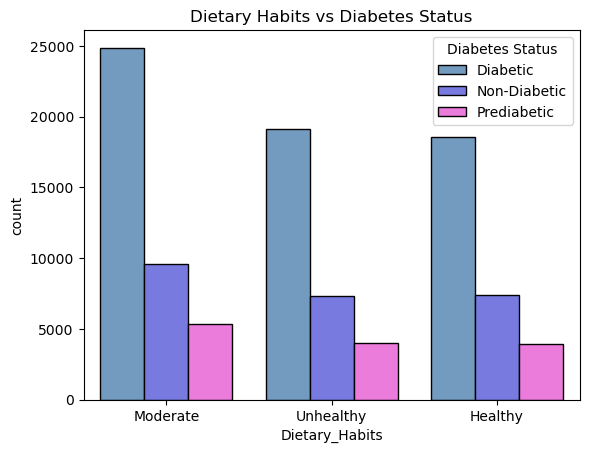

In [170]:
colour_palette = ['#669bcc', '#6769f0', '#ff69e8']


sns.countplot(x='Dietary_Habits', 
              hue='Diabetes_Status', 
              data = final_analysis,
              palette=colour_palette,
              edgecolor='black')
plt.title('Dietary Habits vs Diabetes Status')
plt.legend(title='Diabetes Status')
plt.show()


# The diabetes rate in 'Moderate' dietary habit groups seems to be the higher, which shows the importance of healthy balanced diet

### Conclusion and Findings


1.	Which regions, age groups, and genders are at the highest risk of diabetes?

- The Northeast region has the highest diabetes count (10,400), followed by the North region.
- West and North also show higher HbA1c values, indicating a greater risk of diabetes in these regions.
- Diabetes prevalence shows an increasing trend from age 20 years, peaking around age 24 (most common age among students).
- Both males and females show similar levels of diabetes prevalence across regions and age groups. This indicates that gender is not a significant differentiator in diabetes trends for your population.

2.	What lifestyle factors (e.g., BMI, sleep, physical activity) show the strongest correlation with prediabetes and diabetes?

- The Obese category has the highest count (41,500 students), and obesity is a major risk factor for diabetes.
- Students with sedentary lifestyles are more likely to be overweight or obese, further increasing their diabetes risk.
- The average sleep duration across diabetes groups is 6.9 hours, which is on the lower side of the recommended 7–9 hours.
- However, no strong correlation was found between sleep hours and diabetes in the analysis.


3.	Are there any alarming trends, such as sedentary lifestyles or high stress levels, contributing to diabetes prevalence?

- The majority of students are in the Sedentary physical activity category, which is strongly associated with obesity and overweight cases.
- This is a significant contributor to diabetes prevalence.
- No significant correlation or trend was observed between stress levels, screen time, and diabetes. However, these factors may still influence long-term health outcomes.


4.	How does family history or genetic risk impact diabetes across different demographics?

- 35% of students with diabetes have a family history of diabetes, indicating a strong genetic component.
- Among the population, 65% of parent diabetes types are unknown, but 25% were identified as Type 2 diabetes, emphasizing the need for better family health documentation.

### Recommendations:

1. **Regional Focus:** Target Northeast, North, and West regions for diabetes awareness campaigns and health screenings.

2. **Lifestyle Interventions:** Develop programs promoting physical activity and reducing sedentary behavior, especially for the obese and overweight population.

3. **Family Health Records:** Improve documentation of family health history to better understand genetic risk factors.

4. **Youth Awareness:** Educate young adults (20–24) about diabetes risk factors, including dietary habits, physical activity, and BMI management.

5. **Dietary Counseling:** Address unhealthy eating habits in the 'Moderate' dietary group to reduce diabetes prevalence.